In [2]:
# Exercise

# Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

# Measure accuracy of your model using different kernels such as rbf and linear.
# Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
# Use 80% of samples as training data size

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [4]:
dataset = load_digits()

In [5]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
df = pd.DataFrame(dataset.data)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
X = df

In [9]:
y = dataset.target

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC()

In [13]:
clf.fit(X_train, y_train)

SVC()

In [14]:
clf.score(X_test, y_test)

0.9916666666666667

In [15]:
dataset.data[60]

array([ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13.,
       16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
        0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,
        0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5.,
        6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.])

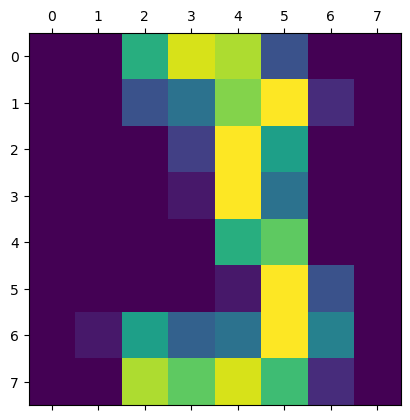

In [16]:
plt.matshow(dataset.images[60])

In [17]:
clf.predict([dataset.data[60]])

array([3])

In [18]:
## confusion matrix

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


0.9916666666666667

<Axes: >

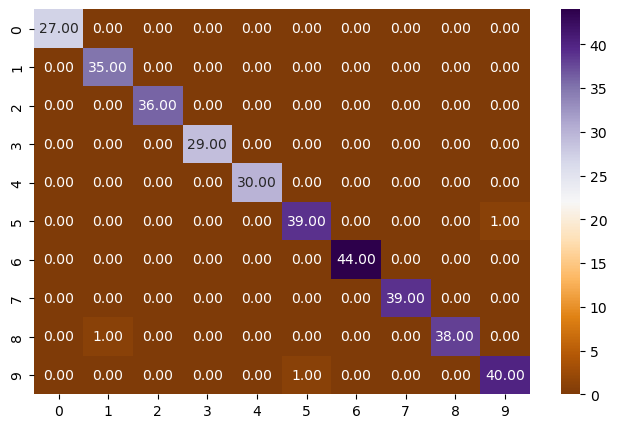

In [21]:
import seaborn as sn
plt.figure(figsize = (8,5))
#sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(data= cm, cmap = "PuOr", annot = True ,fmt= ".2f")